## Red and White Wine Quality Analysis 

**Data BootCamp - Fall 2018 MBA**

**Caroline Packowski, Gabrielle Sart and Kaitlin Slattery**


### Introduction 

Need to write up 

### Packages

Need to write up 

In [30]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np                    # scientific computing   
import seaborn as sns                 # data visualization 
import statsmodels.api as sm          # statistical modeling

### DataSet Information 

Need to write up 

Not sure where we want to put it all, but need to go through each variable 

Quality is dependent variable, everything else is independent (although, they may be interrelated - chemistry!) 

In [21]:
url_white = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityWhites.csv" 
url_red = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityReds.csv"

dfwhite = pd.read_csv(url_white) # Read in dataset on white wine quality 
dfred = pd.read_csv(url_red) # Read in dataset on red wine quality 

dfwhite = dfwhite.rename(columns={'Unnamed: 0':'wine number'}) # Rename the first column 
dfred = dfred.rename(columns={'Unnamed: 0':'wine number'}) # Rename the first column 

dfwhite['type']='White' # Added a column to dfwhite for 'type' = 'White'
dfred['type']='Red' # Added a column to dfred for 'type' = 'Red'

dfwhite = dfwhite.set_index(['wine number', 'type']) # Set two indexes 
dfred = dfred.set_index(['wine number', 'type']) # Set two indexes 



**White Wine Data Set Information**

In [22]:
dfwhite

,,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6


In [23]:
dfwhite.shape

(4898, 12)

**Red Wine Data Set Information**

In [24]:
dfred

,,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
6,Red,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,Red,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
8,Red,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
9,Red,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7


In [26]:
dfred.shape

(1599, 12)

In [27]:
# Want to merge it into one dataset, each with another column for Type - Red or White

frames = [dfwhite, dfred]
df = pd.concat(frames) # Create a new dataframe merging dfwhite and dfred 

df

,,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6


In [28]:
df.describe() # Generate describtive statistics on dataset 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6497 entries, (1, White) to (1599, Red)
Data columns (total 12 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 666.5+ KB


### Distribution of Wine Quality 



In [31]:
dfwhite['quality'].value_counts() # White wine quality count

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [32]:
dfred['quality'].value_counts() # Red wine quality count 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [33]:
df['quality'].value_counts() # Red and White wine quality count 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

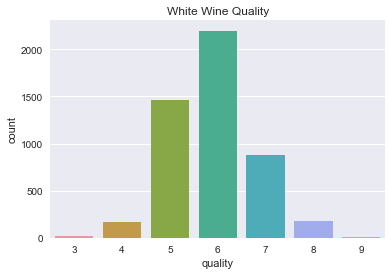

In [48]:
## Bar chart showing white wine quality breakdown 

sns.set(style='darkgrid')

sns.countplot(x = 'quality',
              data = dfwhite).set_title('White Wine Quality')
plt.show()

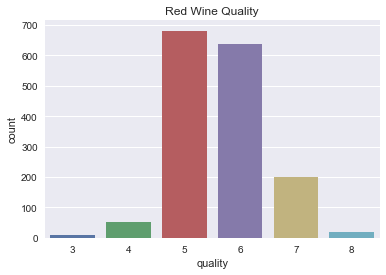

In [52]:
## Bar chart showing red wine quality breakdown 

sns.set(style='darkgrid')

sns.countplot(x = 'quality',
              data = dfred).set_title('Red Wine Quality')
plt.show()

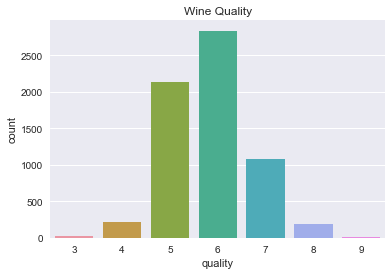

In [71]:
## Bar chart showing wine quality breakdown 

sns.set(style='darkgrid')

sns.countplot(x = 'quality',
              data = df).set_title('Wine Quality')
plt.show()

In [56]:
## Want to attempt to show it all of wine quality - but white wines have a white bar, and red wine have a red bar?  

df_plot = df.groupby(['type', 'quality']).size().reset_index().pivot(columns='type', index='quality', values=0)


In [57]:
df_plot

type,Red,White
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


Text(0.5,1,'Wine Quality Count')

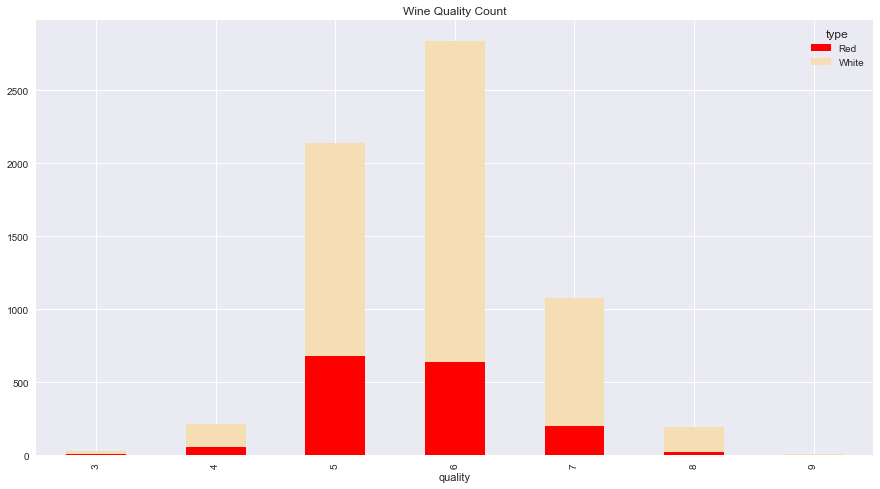

In [82]:
df_plot.plot(kind='bar', stacked=True, figsize=(15,8), color =['red','wheat']).set_title('Wine Quality Count')

## Scatter plot for each independent variable against quality 

## Regression for each variable against quality -- only certain variable 

## What variables play a diference in red versus white wine